# Predicting a Song's Owner by Audio Features

## 1. Import Necessary Libraries

In [249]:
#data analysis libraries 
import numpy as np
import pandas as pd
import scipy.stats

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Read In Data

### 2.1 Read In Data from CSV Files

In [250]:
#import data using .read_csv()
train = pd.read_csv("/Users/Nadin/Desktop/CS/SpotifyML/AudioFeaturesAnalysis/nadincandf.csv")
nadin = train[train['owner']=='Nadin']
can = train[train['owner']=='Can']

### 2.2 Split Original Data

In [251]:
#numeric datasets include only the numeric values from the original dataset
#small datasets include only numeric values between 0 and 1 (easy to plot on the same scale)
train_numeric = train.drop(['id','name','artists'], axis=1)

can_numeric = can.drop(['id','name','artists'], axis=1)
can_small = can_numeric.drop(['tempo','duration_ms','key','loudness','time_signature'], axis=1)

nadin_numeric = nadin.drop(['id','name','artists'], axis=1)
nadin_small = nadin_numeric.drop(['tempo','duration_ms','key','loudness','time_signature'], axis=1)

can_means = pd.DataFrame(can_small.mean(axis=0)).T
nadin_means = pd.DataFrame(nadin_small.mean(axis=0)).T
nadin_means['owner'] = 'Nadin'
can_means['owner'] = 'Can'

means = nadin_means.append(can_means)
means.head()

,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,owner
0,0.611940,0.66841,0.56,0.072362,0.209297,0.000431,0.155676,0.590436,Nadin
0,0.479904,0.66200,0.49,0.048773,0.196352,0.178966,0.210066,0.529803,Can


## 3. Data Visualization

### 3.1 Set Color Palette

In [252]:
#create a palette from hex codes and set palette
bright=["#F8766D","#00BFC4","#FFC400","#03ED3A","#003FFF","#8A2BE2"]
sns.set_palette(bright)

### 3.2 Plot Mean Audio Features by Owner

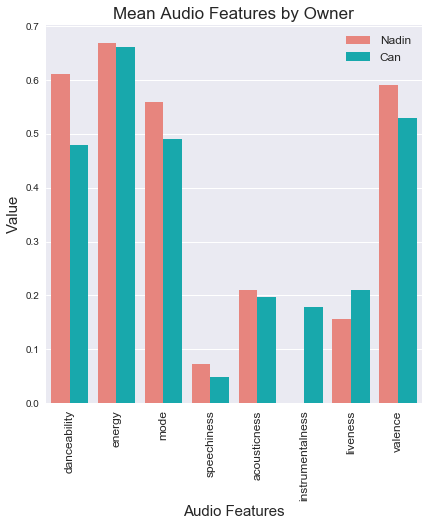

In [253]:
#plot mean audio features by owner
new = means.melt('owner', var_name='cols',  value_name='vals')
sns.factorplot(x="cols", y="vals", hue='owner', data=new, kind='bar', size=6, legend_out=False)
plt.xticks(rotation = 90, fontsize = 12) #set audio feature labels
plt.ylabel("Value", fontsize = 15) #set y axis label
plt.xlabel("Audio Features", fontsize = 15) #set x axis label
plt.title("Mean Audio Features by Owner", fontsize = 17) #set chart title
plt.legend(fontsize=12) #increase legend fontsize
plt.show() #remove text output

### 3.3 Plot Feature Distribution

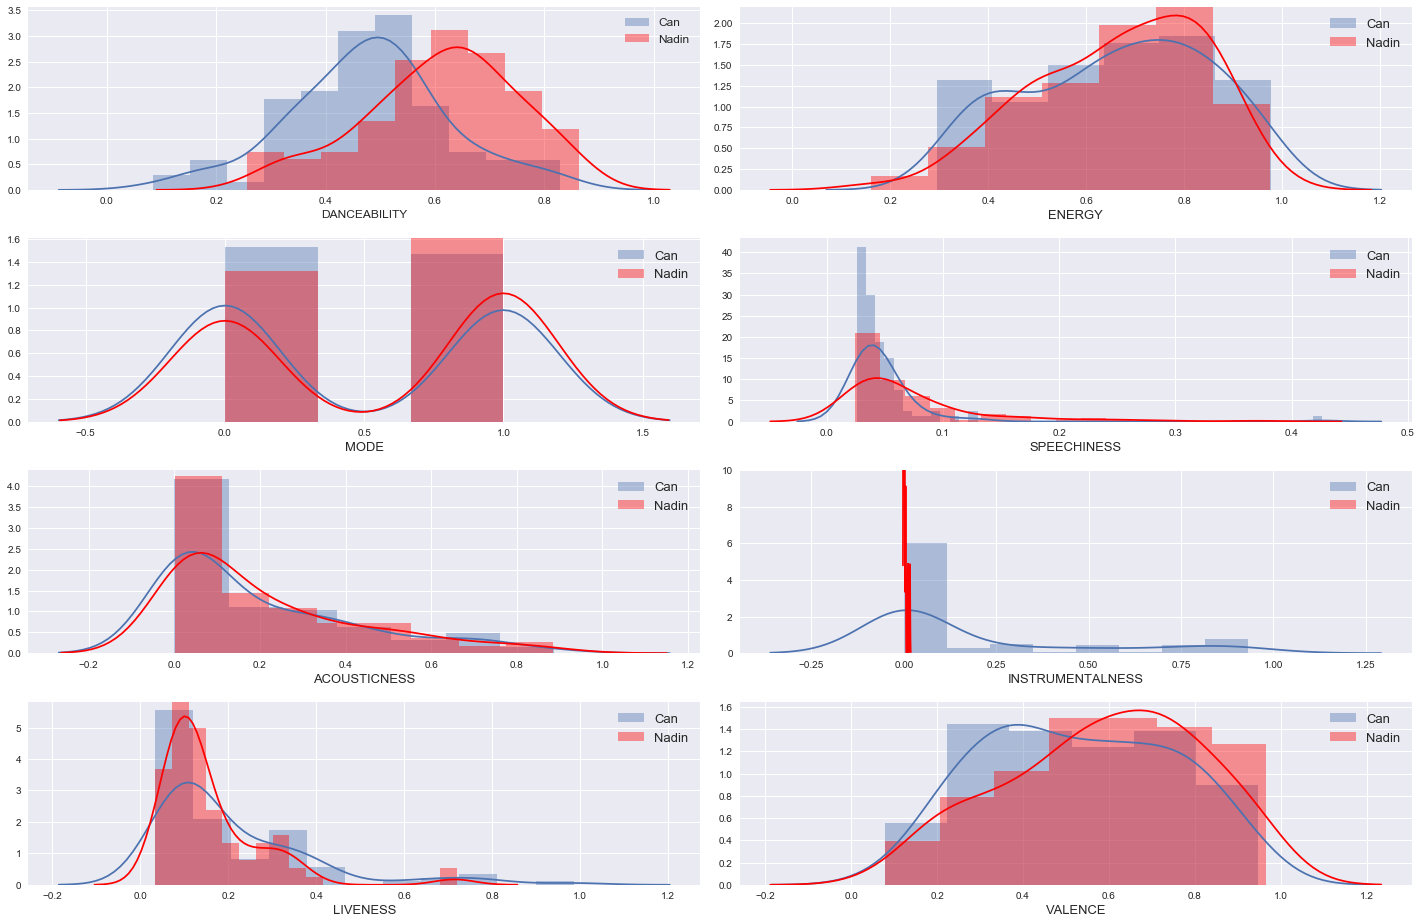

In [254]:
#set figure size
sns.set(rc={'figure.figsize':(20,13)})

#Danceability
plt.subplot(421)
sns.distplot(can['danceability'], label='Can')
sns.distplot(nadin['danceability'], color='r', label='Nadin')
plt.xlabel('DANCEABILITY', fontsize=12)
plt.legend(fontsize=12)

#Energy
plt.subplot(422)
sns.distplot(can['energy'], label='Can')
sns.distplot(nadin['energy'], color='r', label='Nadin')
plt.xlabel('ENERGY', fontsize=13)
plt.legend(fontsize=13)

#Mode
plt.subplot(423)
sns.distplot(can['mode'], label='Can')
sns.distplot(nadin['mode'], color='r', label='Nadin')
plt.xlabel('MODE', fontsize=13)
plt.legend(fontsize=13)

#Speechiness
plt.subplot(424)
sns.distplot(can['speechiness'], label='Can')
sns.distplot(nadin['speechiness'], color='r', label='Nadin')
plt.xlabel('SPEECHINESS', fontsize=13)
plt.legend(fontsize=13)

#Acousticness
plt.subplot(425)
sns.distplot(can['acousticness'], label='Can')
sns.distplot(nadin['acousticness'], color='r', label='Nadin')
plt.xlabel('ACOUSTICNESS', fontsize=13)
plt.legend(fontsize=13)

#Instrumentalness
plt.subplot(426)
sns.distplot(can['instrumentalness'], label='Can').set(ylim=(0, 10))
sns.distplot(nadin['instrumentalness'], color='r', label='Nadin').set(ylim=(0, 10))
plt.xlabel('INSTRUMENTALNESS', fontsize=13)
plt.legend(fontsize=13)

#Liveness
plt.subplot(427)
sns.distplot(can['liveness'], label='Can')
sns.distplot(nadin['liveness'], color='r', label='Nadin')
plt.xlabel('LIVENESS', fontsize=13)
plt.legend(fontsize=13)

#Valence
plt.subplot(428)
sns.distplot(can['valence'], label='Can')
sns.distplot(nadin['valence'], color='r', label='Nadin')
plt.xlabel('VALENCE', fontsize=13)
plt.legend(fontsize=13)

plt.tight_layout()
plt.show()

### 3.4 Make Correlation Heatmap

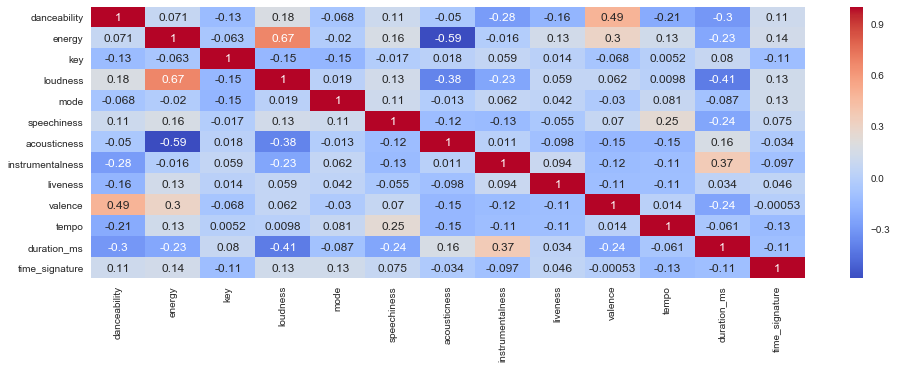

In [255]:
#make correlation heatmap of numerical features
plt.figure(figsize = (16,5))
sns.heatmap(train_numeric.corr(), cmap="coolwarm", annot=True)
plt.show()

## 4. Machine Learning

### 4.1 Import Libraries

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 4.2 Separate Training Set into Train and Test Sets

In [257]:
#separate the dataset into two separate sets to train and test the model
features = train.drop(['owner','id','name','artists'], axis=1)
target = train['owner']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size= 0.15)
print('Features Training Set:', x_train.shape, 'Features Testing Set:', x_test.shape)
print('Target Training Set:', y_train.shape, 'Target Testing Set:', y_test.shape)

Features Training Set: (170, 13) Features Testing Set: (30, 13)
Target Training Set: (170,) Target Testing Set: (30,)


### 4.3 Train RandomForestClassifier

In [266]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
acc_randomforest = accuracy_score(y_pred, y_test) * 100
print("Random Forest:", acc_randomforest)

Random Forest: 73.3333333333


### 4.4 Use GridSearchCV() to Find Best Parameters

In [265]:
#use GridSearchCV() to find the best parameters for the model
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_cv = GridSearchCV(estimator=randomforest, param_grid=param_grid)
rf_cv.fit(x_train, y_train)

print(rf_cv.best_params_)

y_pred = rf_cv.predict(x_test)
acc_rfcv = accuracy_score(y_pred, y_test)*100
print("Random Forest GridSearchCV:", acc_rfcv)

{'max_features': 'log2', 'n_estimators': 200}
Random Forest GridSearchCV: 80.0


### 4.5 Test Model on Some Random Songs

In [260]:
testdf = pd.read_csv("/Users/Nadin/Desktop/CS/SpotifyML/AudioFeaturesAnalysis/testdf.csv")
owners = ['Nadin','Nadin','Nadin','Nadin','Nadin','Nadin','Nadin','Can','Can','Can','Can','Can','Can','Can']
prediction = rf_cv.predict(testdf)
accuracy = accuracy_score(prediction, owners)
print("Correct Predictions: %d/%d"%(accuracy*len(owners),len(owners)))
print("Accuracy: %.2f%%"%(accuracy*100))

Correct Predictions: 13/14
Accuracy: 92.86%
